<a href="https://colab.research.google.com/github/shinsuikyo/cumberlands/blob/main/DataVisualizationWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the CSV file
df = pd.read_csv('/content/Fortune500Sector.csv')


Index(['Company', 'Sector', 'Profits ($ millions)',
       'Market Capitalization ($ millions)'],
      dtype='object')
               Company       Sector Profits ($ millions)  \
0  Alliant Techsystems  Industrials                313.2   
1           Amazon.com     Consumer                  631   
2    AmerisourceBergen   Healthcare                706.6   
3    Avis Budget Group  Industrials                  -29   
4               Boeing  Industrials             4,018.00   

   Market Capitalization ($ millions)  
0                              1891.9  
1                             81458.6  
2                             10087.6  
3                              1175.8  
4                             55188.8  


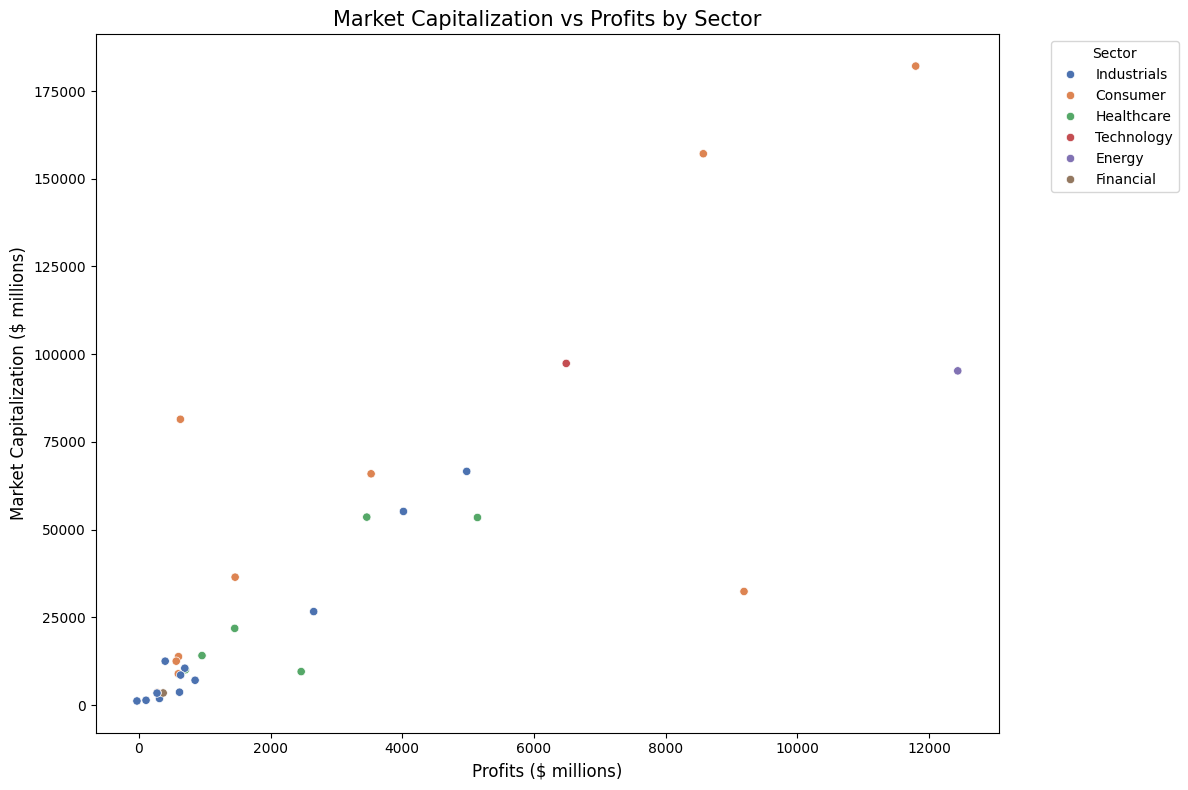

In [2]:

# Print column names and first few rows to debug
print(df.columns)
print(df.head())

# Clean and convert Profits and Market Capitalization to numeric
# First, ensure the columns are strings
df['Profits ($ millions)'] = df['Profits ($ millions)'].astype(str)
df['Market Capitalization ($ millions)'] = df['Market Capitalization ($ millions)'].astype(str)

# Remove '$' and ',' and convert to numeric
df['Profits ($ millions)'] = pd.to_numeric(df['Profits ($ millions)'].str.replace('$', '').str.replace(',', ''), errors='coerce')
df['Market Capitalization ($ millions)'] = pd.to_numeric(df['Market Capitalization ($ millions)'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Profits ($ millions)', y='Market Capitalization ($ millions)', hue='Sector', palette='deep')

plt.title('Market Capitalization vs Profits by Sector', fontsize=15)
plt.xlabel('Profits ($ millions)', fontsize=12)
plt.ylabel('Market Capitalization ($ millions)', fontsize=12)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Healthcare Sector Trendline Details:
Slope: 10.4801
Intercept: 2326.4136
R-squared: 0.7261
P-value: 0.0312


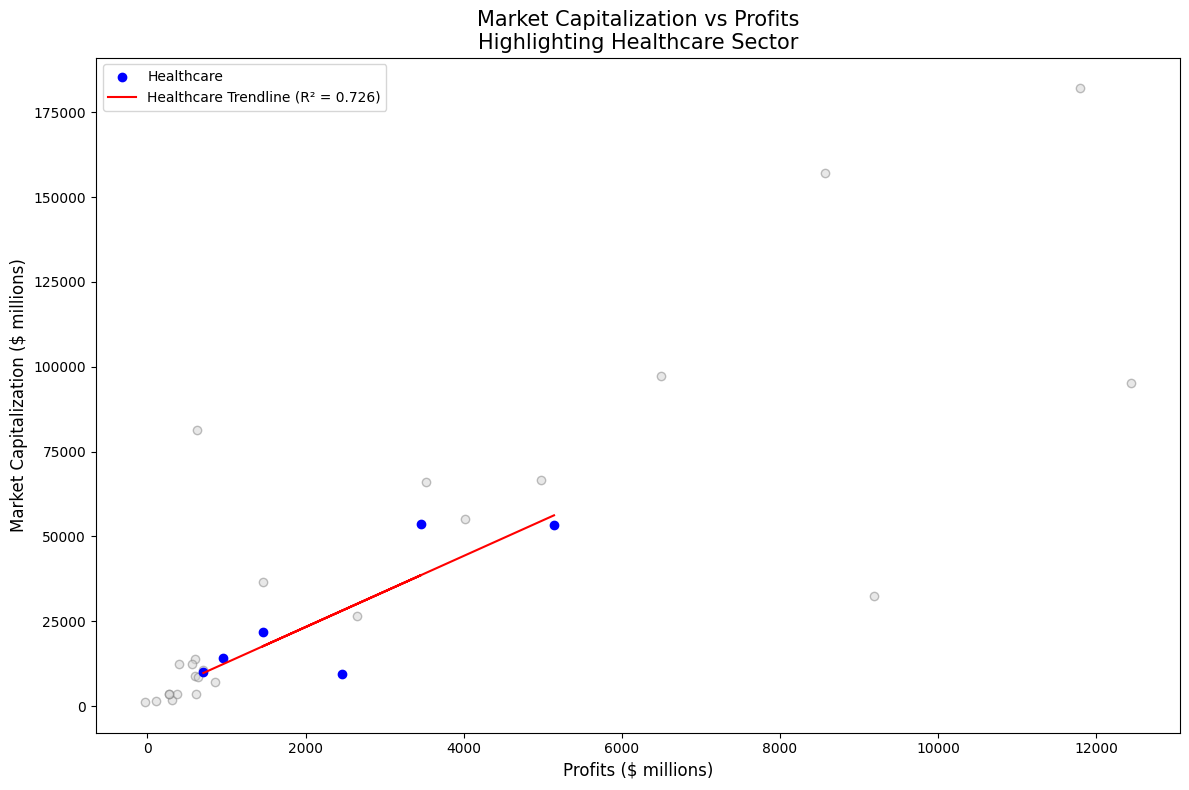

In [5]:
# Clean and convert columns to numeric
# df['Profits ($ millions)'] = pd.to_numeric(df['Profits ($ millions)'].str.replace('$', '').str.replace(',', ''), errors='coerce')
# df['Market Capitalization ($ millions)'] = pd.to_numeric(df['Market Capitalization ($ millions)'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Separate healthcare sector
healthcare_df = df[df['Sector'] == 'Healthcare']
other_sectors_df = df[df['Sector'] != 'Healthcare']

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot other sectors in gray
plt.scatter(other_sectors_df['Profits ($ millions)'],
            other_sectors_df['Market Capitalization ($ millions)'],
            color='lightgray',
            edgecolors='gray',
            alpha=0.5)

# Plot healthcare sector with color
plt.scatter(healthcare_df['Profits ($ millions)'],
            healthcare_df['Market Capitalization ($ millions)'],
            color='blue',
            label='Healthcare')

# Calculate trendline for healthcare sector
slope, intercept, r_value, p_value, std_err = stats.linregress(
    healthcare_df['Profits ($ millions)'],
    healthcare_df['Market Capitalization ($ millions)']
)
line = slope * healthcare_df['Profits ($ millions)'] + intercept

# Plot trendline for healthcare sector
plt.plot(healthcare_df['Profits ($ millions)'], line, color='red',
         label=f'Healthcare Trendline (R² = {r_value**2:.3f})')

plt.title('Market Capitalization vs Profits\nHighlighting Healthcare Sector', fontsize=15)
plt.xlabel('Profits ($ millions)', fontsize=12)
plt.ylabel('Market Capitalization ($ millions)', fontsize=12)
plt.legend(loc='best')
plt.tight_layout()

# Print trendline details
print(f"Healthcare Sector Trendline Details:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

plt.show()

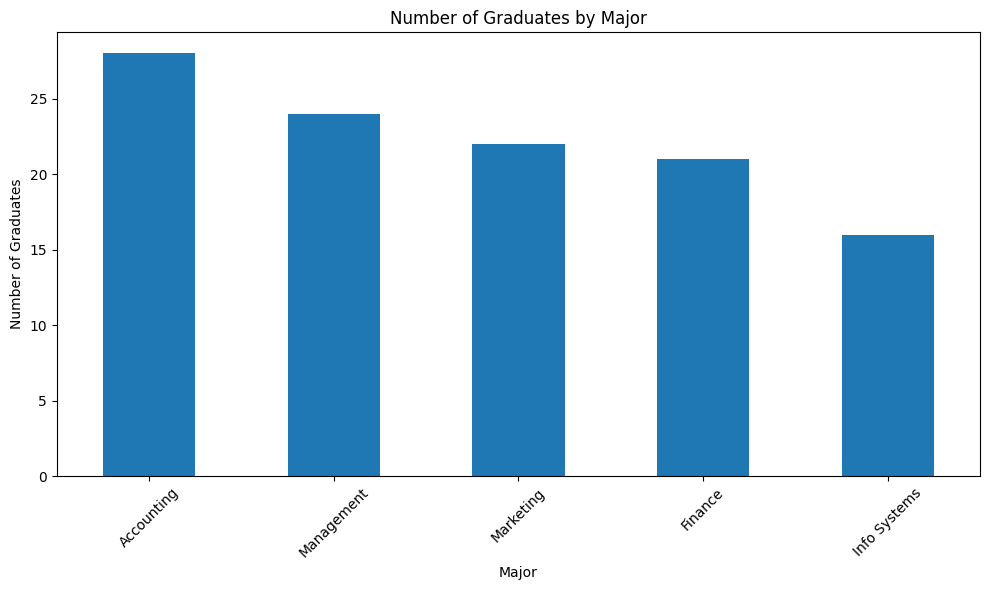

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('MajorSalary.csv')

# 1. PivotChart for Number of Graduates by Major
plt.figure(figsize=(10, 6))
major_counts = df['Major'].value_counts()
major_counts.plot(kind='bar')
plt.title('Number of Graduates by Major')
plt.xlabel('Major')
plt.ylabel('Number of Graduates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



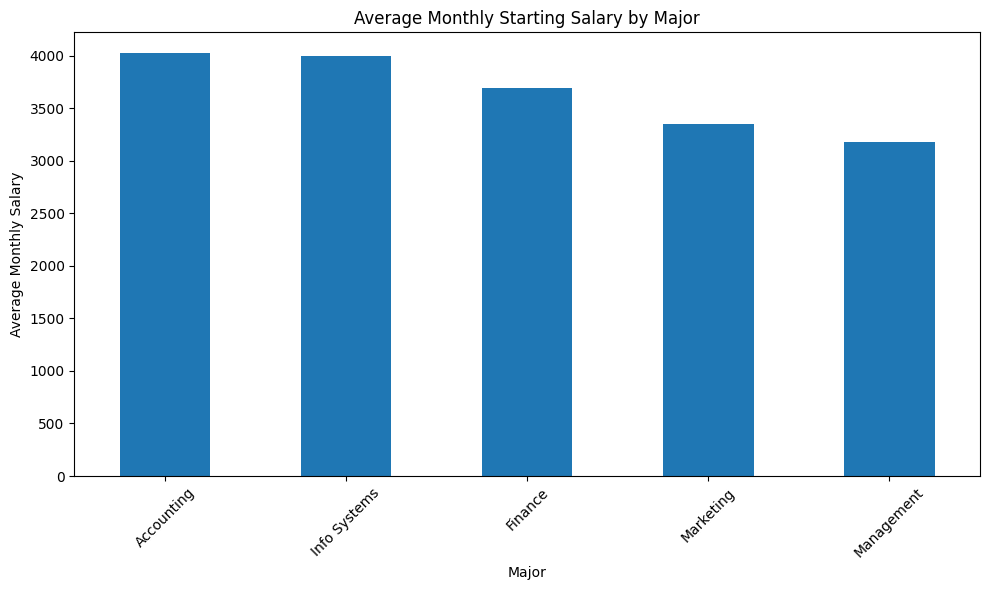


Average Monthly Salaries by Major:
Major
Accounting      4020.0
Info Systems    4000.0
Finance         3695.0
Marketing       3345.0
Management      3180.0
Name: Monthy Salary, dtype: float64


In [7]:
# 2. PivotChart for Average Monthly Starting Salary by Major
plt.figure(figsize=(10, 6))
avg_salaries = df.groupby('Major')['Monthy Salary'].mean().sort_values(ascending=False)
avg_salaries.plot(kind='bar')
plt.title('Average Monthly Starting Salary by Major')
plt.xlabel('Major')
plt.ylabel('Average Monthly Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nAverage Monthly Salaries by Major:")
print(avg_salaries)